O problema consiste numa mochila, de capacidade
x, e um conjunto de n itens de
pesos p_1,p_2,...,p_n, e com valores v_1,v_2,...
,v_n associados. De acordo com esses valores, o
objetivo é alocar itens na mochila sem repeti-
los, respeitando o peso máximo de cada mochila,
encontrando ainda, o maior valor possível. Estamos utilizando uma mochila binária que receberá o valor 1 (um) se o
item j for alocado ao recipiente i, caso contrário, será
0 (zero). Pelo que li na literatura, existem algumas formas de se resolver o problema da mochila, algumas delas são, Simulated
Annealing, Busca Tabu, Algoritmos Genéticos, Greedy Randomized
Adaptive Search Procedure - GRASP, Variable
Neighborhood Search - VNS e Redes Neurais. Neste notebook estaremos utilizando um Algoritmo Genético que, por definição, é uma técnica de busca utilizada para achar soluções aproximadas em problemas de otimização e busca, e são uma classe particular de algoritmos evolutivos que usam técnicas inspiradas pela biologia evolutiva como mutação, seleção natural e recombinação, e por esse motivo são eficientes em identificar e convergir para soluções ótimas, ou aproximadamente ótimas em níveis globais.

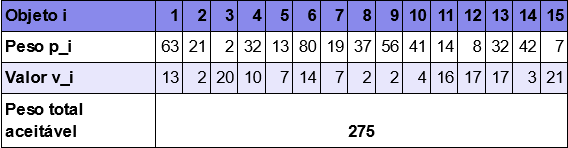



In [18]:
import numpy as np

pesoTotalAceitavel = 275
p_i = [63, 21, 2, 32, 13, 80, 19, 37, 56, 41, 14, 8, 32, 42, 7]
v_i = [13, 2, 20, 10, 7, 14, 7, 2, 2, 4, 16, 17, 17, 3, 21]

def MochilaGenetica(tamanhoPopulacao, taxaMutacao, taxaCruzamento, numGeracoes, numElitismo):

  if tamanhoPopulacao < 1 | numGeracoes < 1 | numElitismo > tamanhoPopulacao:
    return
  populacao = CriaPopulacao(tamanhoPopulacao)
  restPopulacao, restDiv = divmod(tamanhoPopulacao - numElitismo, 2)

  for g in range(numGeracoes):
    proxGenoma = []
    for j in range(numElitismo):
      proxGenoma.append(populacao[j])
    
    for i in range(restPopulacao):
      parenteUm, parenteDois = SelecionaPais(populacao), SelecionaPais(populacao)
      filhos = AplicaCruzamento(parenteUm, parenteDois, taxaCruzamento)
      for c in filhos:
        mutacao = np.random.random()
        if mutacao <= taxaMutacao: c = AplicaMutacao(c)
        InsercaoIndividual(c, proxGenoma)
    
    if restDiv:
      p = SelecionaPais(populacao)
      mutacao = np.random.random()
      if mutacao <= taxaMutacao: p = AplicaMutacao(p)
      InsercaoIndividual(p, proxGenoma)
       
    populacao = proxGenoma
    
  return populacao[0]

def InsercaoIndividual(novoIndividuo, populacao):
    i = 0
    while i < len(populacao):
      if populacao[i][0] < novoIndividuo[0]:
        break
      i+=1
    populacao.insert(i, novoIndividuo)

def AchaMelhorSolucao(solucao):
  peso, valor = 0, 0
  for i in range(15):
    bit = (solucao >> i) & 1
    if bit:
      peso += p_i[i]
      valor += v_i[i]
  return peso, valor

def capacResult(solucao):
  peso, valor = AchaMelhorSolucao(solucao)
  if peso > pesoTotalAceitavel:
    return valor - peso
  else: return valor

def CriaPopulacao(tamanhoPopulacao):
  amostraPopulacao = np.random.randint(10000, size=tamanhoPopulacao)
  populacao = []
  for i in amostraPopulacao:
    solucUni = (capacResult(i), i)
    InsercaoIndividual(solucUni, populacao)
  return populacao

def AplicaMutacao(solucao): 
  indice = np.random.randint(15)
  solucAplicMutacao = solucao[1] ^ 1 << indice
  capacAplicMutacao = capacResult(solucAplicMutacao)
  return capacAplicMutacao, solucAplicMutacao

np.random.randint(1,3)

def AplicaCruzamento(primGenoma, segGenoma, taxaCruzamento):
  primCorte = np.random.randint(1,15)
  segCorte = 15-primCorte
  defCruza = np.random.random()
  if defCruza <= taxaCruzamento:
    primGenomaRef = primGenoma[1] >> segCorte, primGenoma[1] &(10000 >> primCorte)
    segGenomaRef = segGenoma[1] >> segCorte, segGenoma[1] &(10000 >> primCorte)

    filhoUm = primGenomaRef[0] << segCorte | segGenomaRef[1]
    filhoDois = segGenomaRef[0] << segCorte | primGenomaRef[1] 
  
    return [(capacResult(filhoUm), filhoUm), (capacResult(filhoDois), filhoDois)]
  return [primGenoma, segGenoma]

capacidadeNormal = lambda capacidade, capacMin: capacidade + capacMin + 1

def SelecionaPais(populacao):
  capacMinima = abs(populacao[-1][0])
  somaCapac = 0
  for i in populacao: somaCapac += capacidadeNormal(i[0], capacMinima)
  selecaoCapac = [capacidadeNormal(i[0], capacMinima)/somaCapac for i in populacao]
  return populacao[np.random.choice(len(populacao), p=selecaoCapac)]

if __name__ == '__main__':

  melhorSolucao = MochilaGenetica(tamanhoPopulacao=100,taxaMutacao=0.03,taxaCruzamento=0.9,numGeracoes=200,numElitismo=5)
  peso, valor = AchaMelhorSolucao(melhorSolucao[1])

  print("Melhor Solução:", "\n-Peso:",peso, "\n-Valor:", valor)

  



Melhor Solução: 
-Peso: 269 
-Valor: 123
